<a href="https://colab.research.google.com/github/rehmanaly0051/Pytorch-DeepLearning/blob/main/PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# Computer Vision On Fashion MNIST dataset

## Importing libraries

1. torchvision - base domain library for computer vision
2. torchvision.dataset - getting dataset and data loader fir computer vision
3. torchvision.models - getting pretrained CV models according to our problem
4. torchvision.transforms - functions for manuplating vision data(images) to be suitable for use with an ML model
5. torch.utils.data.Dataset - base dataset class for pytorch
6. torch.utils.data.DataLoader - creating a python over a dataset


In [2]:
# Imorting Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Importing matplotlib
import matplotlib.pyplot as plt

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)

PyTorch version: 2.6.0+cu124
Torchvision version: 0.21.0+cu124


## Getting Dataset


In [3]:
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform= ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 197kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.68MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.0MB/s]


In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# First Training Exmaple
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
# shape of our dataset image
#image.shape, label
print(f'Image Shape {image.shape} -> [color channels, Height, Width]')
print(f'Total labels -> {label}')

Image Shape torch.Size([1, 28, 28]) -> [color channels, Height, Width]
Total labels -> 9


## Visualizing data

Image shape torch.Size([1, 28, 28])


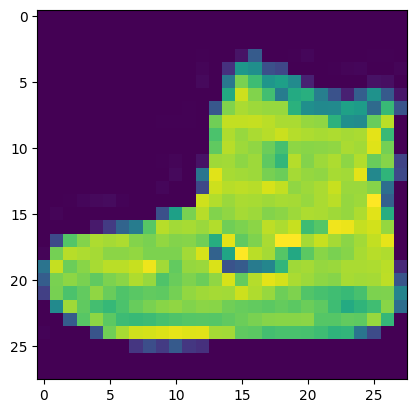

In [10]:
image, label = train_data[0]
print(f'Image shape {image.shape}')
plt.imshow(image.squeeze())

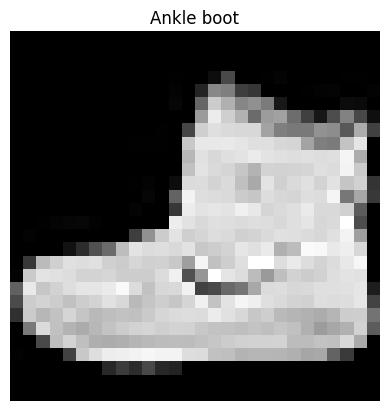

In [11]:
plt.imshow(image.squeeze() ,cmap='gray')
plt.title(class_names[label])
plt.axis(False)
plt.show()

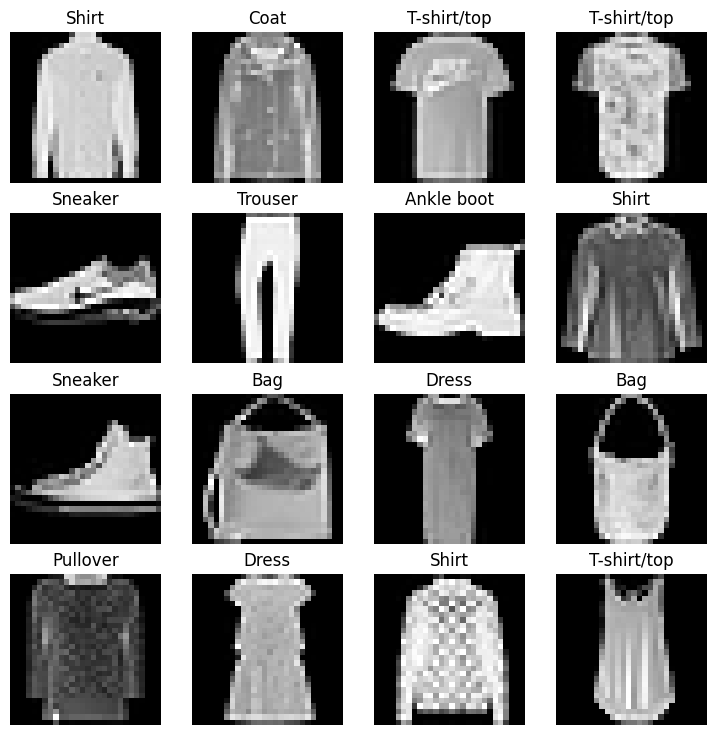

In [12]:
#torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)

    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

d

## Prepare DataLoader

1. our data is in the form of pytorch datasets
2. dataloader turn datasets into iterable

3. turning data into batches (mini batches)
4. our computing hardware cannot be look at the entire dataset (images) in one hit. so break down into 32 images at a time (batch_size = 32
)
5. it gives chance to our neural network to update its gradients per epoch


In [15]:
# Prepraring DataLoader
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ab1d4de4550>,
 <torch.utils.data.dataloader.DataLoader at 0x7ab1d52e1310>)

In [18]:
print(f'DataLoader : {train_dataloader}, {test_dataloader}')
print(f'Length of Train DataLoader : {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of Test DataLoader : {len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoader : <torch.utils.data.dataloader.DataLoader object at 0x7ab1d4de4550>, <torch.utils.data.dataloader.DataLoader object at 0x7ab1d52e1310>
Length of Train DataLoader : 1875 batches of 32
Length of Test DataLoader : 313 batches of 32


In [19]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
# Showing a sample

torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch))z